# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

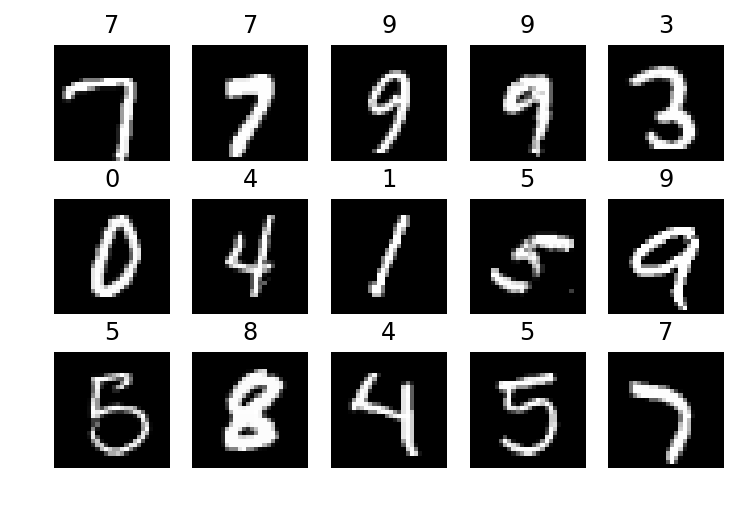

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [3]:
from __future__ import print_function # added by myself

In [4]:
%%time

import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    for i_sample in range(X_len):
        ind_pics = np.random.choice(range(X_len), size=np.random.choice(range(1, n_len+1)))
        
        concat_x = np.concatenate([X[ii] for ii in ind_pics], axis=1)
        concat_x = concat_x.reshape((concat_x.shape[0], concat_x.shape[1], 1))
        if len(ind_pics) < n_len:
            zerosMat = np.zeros((height, width*(n_len-len(ind_pics)), 1), dtype=np.uint8)
            concat_x = np.concatenate((concat_x, zerosMat), axis=1)
        X_gen[i_sample] += concat_x
        
        # process image with true number
        for ind,ind_pic in enumerate(ind_pics):
            y_gen[ind][i_sample, y[ind_pic]] = 1
        
        # process image without any number
        for ind in range(n_len):
            if (0 == np.count_nonzero(X_gen[i_sample][:,(width*ind):(width*(ind+1))])):
                y_gen[ind][i_sample, -1] = 1
        print("{} ok".format(i_sample),end='\r')
    print('Finish this round.')
    
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, \
                                                                      test_size=.2, random_state=19)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

Finish this round.
Finish this round.
Finish this round.
CPU times: user 2min 15s, sys: 2.65 s, total: 2min 18s
Wall time: 2min 12s


In [4]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from __future__ import print_function # added by myself
# import multiprocessing # added by myself
# from contextlib import closing # added by myself

# n_class, n_len, width, height = 11, 5, 28, 28

# def gen_subset(*params):
#     X_range, X_gen, y_gen, X, y = params[0]
#     # TODO: 随机取1~5个数字，并拼接成新的图片
#     for i_sample in X_range:
#         ind_pics = np.random.choice(X_range, size=np.random.choice(range(1, n_len+1)))
#         concat_x = np.concatenate([X[ii] for ii in ind_pics], axis=1)
#         concat_x = concat_x.reshape((concat_x.shape[0], concat_x.shape[1], 1)) 
#         if len(ind_pics) < n_len:
#             zerosMat = np.zeros((height, width*(n_len-len(ind_pics)), 1), dtype=np.uint8)
#             concat_x = np.concatenate((concat_x, zerosMat), axis=1)
#         X_gen[i_sample] += concat_x
#         for ind,ind_pic in enumerate(ind_pics):
#             y_gen[ind][i_sample, y[ind_pic]] = 1 
            
#     return X_gen, y_gen

# def parallelAdd(*args):
#     X_gen, y_gen, xygroup = args[0]
#     for xs, ys in xygroup:
#         for i,x in enumerate(xs):
#             X_gen += x
#             print("{} x ok".format(i),end='\r')
#         for i,newy_i in enumerate(ys):
#             y_gen[i] += newy_i
    
#     return X_gen,y_gen

# def generate_dataset(X, y):
#     X_len = X.shape[0]
    
#     X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
#     y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]

#     #         print("{} ok".format(i_sample),end='\r')
#     cpuCores = multiprocessing.cpu_count()//2
#     eachLen = X_len//cpuCores
#     X_ranges = [(range(i*eachLen, (i+1)*eachLen), X_gen, y_gen, X, y) for i in range(cpuCores)]
#     with closing(multiprocessing.Pool(cpuCores)) as p, closing(multiprocessing.Pool(cpuCores)) as q:
#         newX_newy = p.map(gen_subset, X_ranges)
#         additem = q.map(parallelAdd, (X_gen, y_gen, newX_newy))
#         X_gen += additem[0]
#         y_gen += additem[1]
#         p.terminate()
#         q.terminate()
            
#         #xx = np.sum([x.reshape((x.shape[0],x.shape[1])) for x in xs], axis=0)
#         #X_gen += xx.reshape(xx.shape[0],xx.shape[1],1)
#         #X_gen += np.sum([x for x in xs])

    
#     print('Finish this round.')
    
#     return X_gen, y_gen, newX_newy

# X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, \
#                                                                       test_size=.2, random_state=19)

# X_train, y_train, a0 = generate_dataset(X_raw_train, y_raw_train)
# X_valid, y_valid, a1 = generate_dataset(X_raw_valid, y_raw_valid)
# X_test, y_test, a2 = generate_dataset(X_raw_test, y_raw_test)

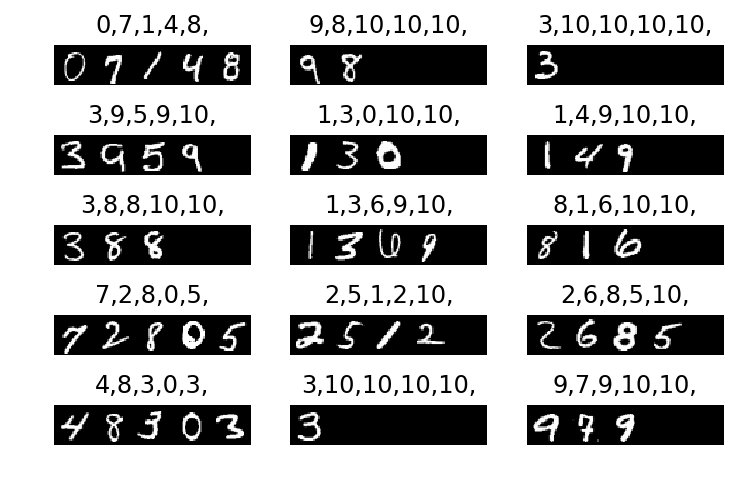

In [5]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**

### 1.1 如何合成数据集

我遍历了整个输入的数据集，每一轮生成一个数字序列；

每一轮中，我随机挑出 1-5 个图片序号，然后将这些序号对应的图片-数字矩阵以列拼接的方式生成新的图片-数字矩阵，若挑出的图片数少于 5，则使用零矩阵继续拼接将新生成的图片-数字矩阵补全为 5 位图片序列的图片-数字矩阵形式；

与此同时，每一轮都将生成一组长度为 5 的标签，每个标签对应于前述生成的一张图上的数字；

在生成标签时，若发现图上无数字，则将被辨识为 10。

### 1.2 为什么要划分为训练集、验证集、测试集

之所以要单独划分出训练集，是为了方便留下一部分数据集、以评估模型的泛化能力。

而之所以不仅仅分为「训练集」与「测试集」，而还要从取出一部分来作为「验证集」，是为了通过这部分与训练集、测试集独立的数据集来调节模型的参数。

如果仅仅划分为「训练集」与「测试集」，通过测试集上对模型的评估效果来调节模型参数，这会导致测试集的信息在调参过程中间接「渗透」到模型中，从而使测试集对模型（泛化）能力的评估可靠程度大打折扣，从而我们便无法通过现有的数据集较为准确地得知模型的实际效果。

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [函数式模型 API](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [44]:
from keras.models import Model
from keras.layers import *

# TODO: 构建你的模型

## design models

### base model

input_shape = (height, width, 1)

myInput = Input(shape=(height, width, 1), name='myInput')
myConvs_0 = Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape, 
                    name='conv_0')(myInput) 
myConvs_1 = Conv2D(64, kernel_size=(3,3), activation='relu', 
                    name='conv_1')(myConvs_0) 
myPools_0 = MaxPool2D(pool_size=(2,2),
                      name='pool_0')(myConvs_1) 
myDrops_0 = Dropout(rate=.25, 
                     name='dropout_0')(myPools_0) 
myFlats_0 = Flatten(name='flatten_0')(myDrops_0) 
myDenses_0 = Dense(128, activation='relu', 
                    name='dense_0')(myFlats_0) 
myDrops_1 = Dropout(rate=.5, 
                     name='dropout_1')(myDenses_0) 

model_base = Model(inputs=myInput, outputs=myDrops_1, name='model_base')

### seq model using base model

rawdata = Input(shape=(height, width*n_len, 1), name='dataRaw')
inputs = []
for i in range(n_len):
    xx =Lambda(function=lambda a: a[:,:,(width*i):(width*(i+1))],output_shape=(height,width, 1))(rawdata)
    inputs.append(Input(tensor=xx, name='input-{}'.format(i)))
    #####next 4 line is another style#####
#     xx = rawdata[:,:,(width*i):(width*(i+1))]
#     inputs.append(Input(tensor=xx, name='input-{}'.format(i)))

# inputs = [Input(shape=(height, width, 1), name='input-{}'.format(i)) for i in range(n_len)]

inters = [model_base(inp) for inp in inputs]
concatenated = concatenate(inters, name='concatenate_layer')

outputs = [Dense(n_class, activation='softmax', 
                    name='output-{}'.format(i))(concatenated)
          for i in range(n_len)]

model = Model(inputs, outputs, name='model')

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 

### 2.1 场景分析

1. 输入：
    + 多输入，数目固定
    + 输入为单一矩阵，但实际上要将该矩阵均等切分为 5 个形状一致的矩阵分别作为分类器的输入
2. 输出：
    + 多输出，固定数目：输出为 1-5 个连续数字
3. 目标：
    + 每个数字能正确识别
    + 不仅能正确识别数字，数字的输出顺序也要正确

### 2.2 使用技术

。。。配图。。。修饰表达。。。

+ 问题为图像识别问题，是典型的空间平移不变性问题，可使用卷积神经网络。因此配合使用了**卷积化**、**池化**等技术
  - 所谓**卷积化**，即在小范围的输入空间内对若干输入共享权重
  - 所谓**池化**，即对卷积化的结果根据某种标准进行一定的抽样，以抽取更少但更重要的特征
+ 为了构建更稳定的神经网络，还采用了**丢弃（dropout）**技术
  - 所谓**丢弃（dropout）**，即在训练过程中，每一层的激活值并不全部传递给下一层，而是丢弃一部分、只选择一部分激活值传递给下一层。该技术「迫使」神经网络难以依赖某些已经生成的特定的激活值，学习更多冗余的信息，以减少过拟合、增强稳定性
+ 共享模型：由于对于每一个数字序列而言，所有图片识别问题是相互对称的，因此可使用同一个分类器来对输入进行分类
  - 参考 [Keras 中文文档 - 函数式模型/更多的例子/共享视觉模型](http://keras-cn.readthedocs.io/en/latest/getting_started/functional_API/)

### 可视化你的网络模型

参考链接：[可视化visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是保存成 PNG 格式显示，也可以直接使用 SVG 格式。 SVG 是矢量图，它的优点是可以无限放大。

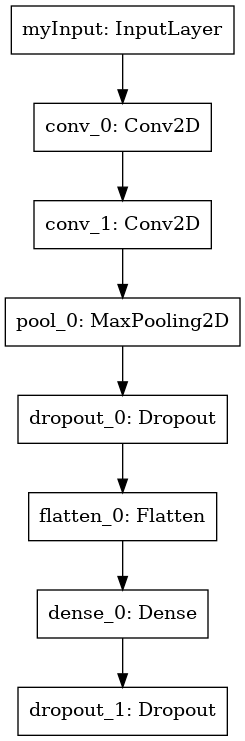

In [45]:
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
modelImageFile = 'model_base.png'
plot_model(model=model_base, to_file=modelImageFile)
Image(filename=modelImageFile)

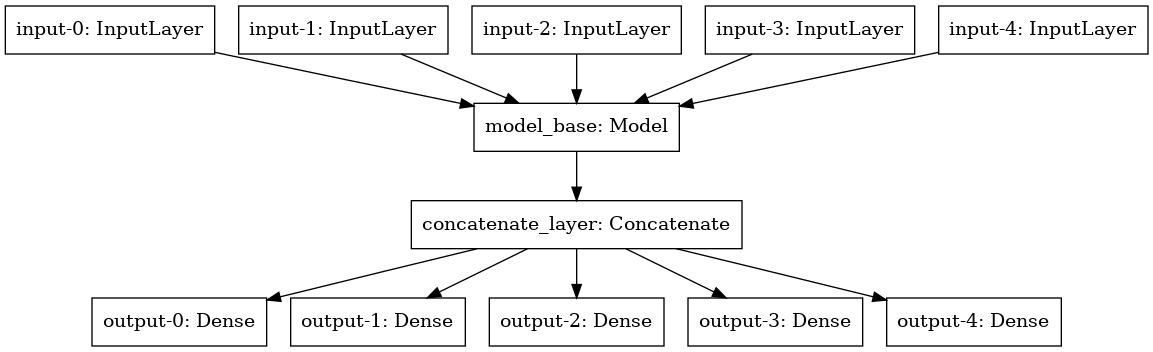

In [46]:
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
modelImageFile = 'model.png'
plot_model(model=model, to_file=modelImageFile)
Image(filename=modelImageFile)

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**

我最终的采用了**卷积神经网络**模型，且该模型是**函数式**的**多输入（5）、多输出（5）**模型。

具体来说：

+ 数据将被切片，分成 5 份输入：在模型图 `model.png` 上显示为 `input-0`~`input-4`
+ 上述**所有**输入**共享同一个模型** `model_base`，模型细节见图 `model_base.png`，具体来说，基础模型是这样的：
    1. 输入首先经过连续 2 层卷积的处理，第一层卷积核数（即输出维度，下同）为 32，第二层卷积核数为 64，卷积核大小均为 3，激活函数为 [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks))
    2. 上述卷积层的最终输出将进入 $ 2 \times 2 $ 的最大池化层进行最大池化工作
    3. 池化后的激活输出将被丢弃 25%，仅有 1 - .25 = .75 = 75% 的输出被压平，将进入后续的全连接层
    4. 被压平后的输出进入具有 128 个单元的全连接层进行处理
    5. 经过上一层全连接层处理后的激活输出被丢弃 50%
    6. 最终剩余的 50% 的输出将与输出层的 `n_class` 个全连接层结点连接，使用 `softmax` 来进行分类
+ 输出是**一次性输出所有数字组合**（而非顺序输出每个数字）。

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [47]:
%%time

# TODO: 训练你的模型

batch_size = 128
epochs = 15
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(
    x=X_train, y=y_train,
    shuffle=True,
    validation_data=(X_valid, y_valid),
    batch_size=batch_size,
    epochs=epochs,
    verbose=1
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15


InvalidArgumentError: Shape [-1,28,140,1] has negative dimensions
	 [[Node: dataRaw_1 = Placeholder[dtype=DT_FLOAT, shape=[?,28,140,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'dataRaw_1', defined at:
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-42a1bb3c8052>", line 31, in <module>
    rawdata = Input(shape=(height, width*n_len, 1), name='dataRaw')
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/keras/engine/topology.py", line 1426, in Input
    input_tensor=tensor)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/keras/legacy/interfaces.py", line 87, in wrapper
    return func(*args, **kwargs)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/keras/engine/topology.py", line 1337, in __init__
    name=self.name)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py", line 432, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/sushangjun/Location/anaconda2/envs/py2/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,28,140,1] has negative dimensions
	 [[Node: dataRaw_1 = Placeholder[dtype=DT_FLOAT, shape=[?,28,140,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [ ]:
def evaluate(model):
    # TODO: 按照错一个就算错的规则计算准确率
    

evaluate(model)

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

In [ ]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要保存模型，以便下次调用。

读取的方式也很简单：`model = load_model('model.h5')`

In [ ]:
model.save('model.h5')